![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
#pip install livelossplot

In [24]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [25]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


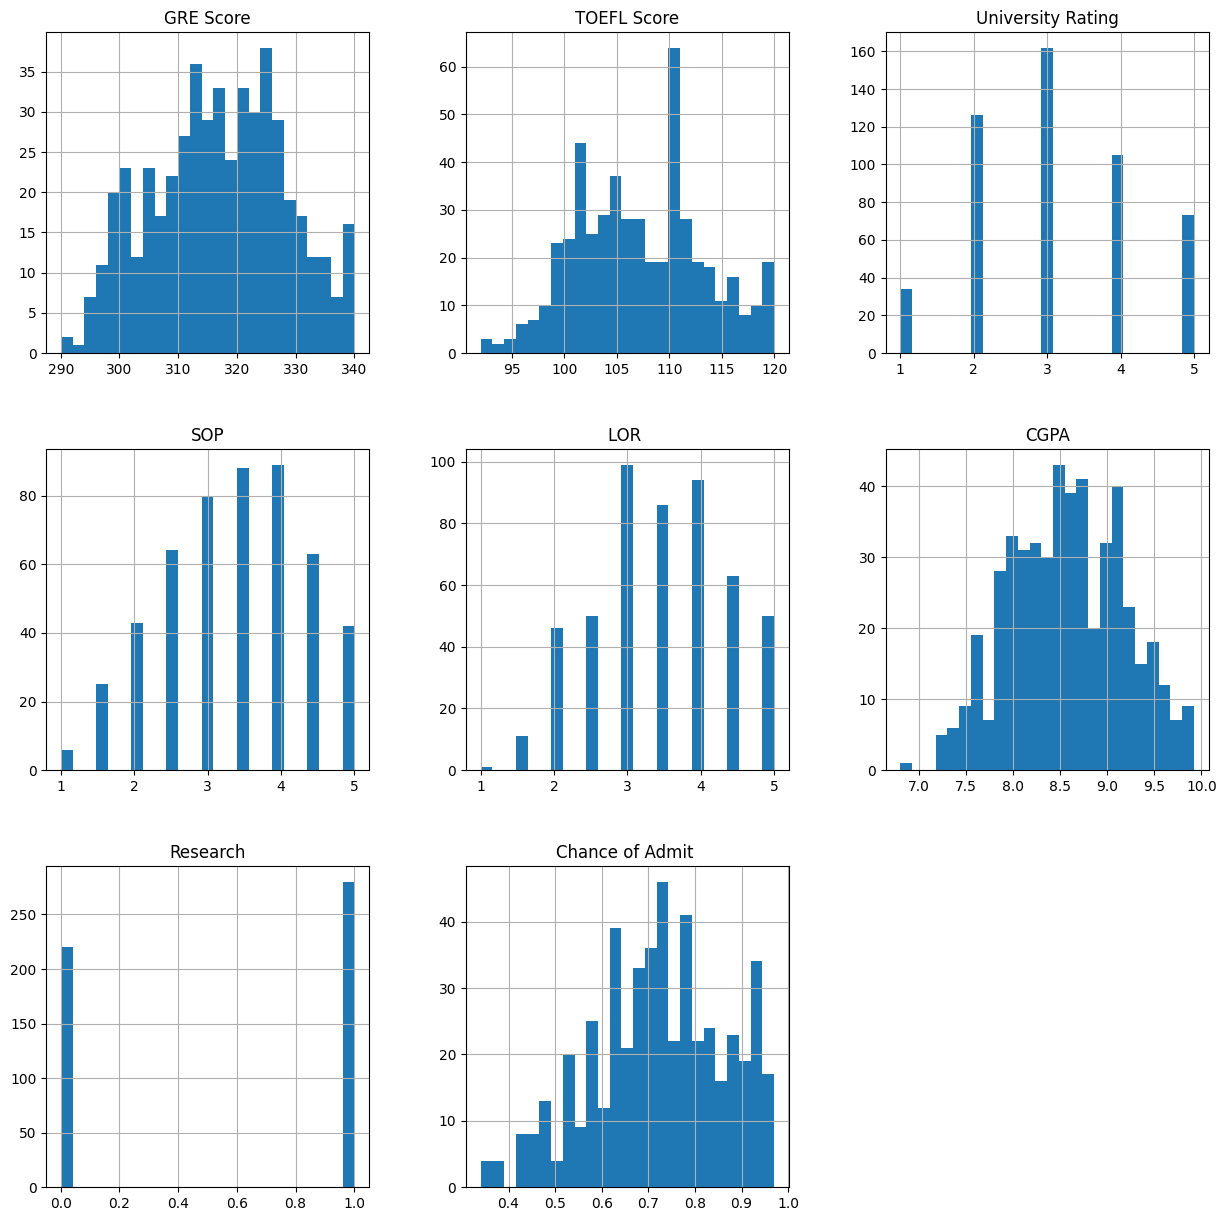

In [26]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [27]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = pd.DataFrame(np.array(data[data.columns[-1]]), columns=['labels'])

In [28]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [29]:
scaler = StandardScaler()
X_train = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)
X_train = np.array(X_train)
Y_train = np.array(yTrain)
X_test = np.array(X_test)
Y_test = np.array(yTest)

In [30]:
output_var = Y_train.shape[1]
print(output_var, ' output variables')

1  output variables


In [31]:
dims = X_train.shape[1]
print(dims, 'input variables')

7 input variables


In [32]:
K.clear_session()
model_p1 = Sequential()
model_p1.add(Dense(output_var, input_shape=(dims,)))
print(model_p1.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (32.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 0 (0.00 B)

None


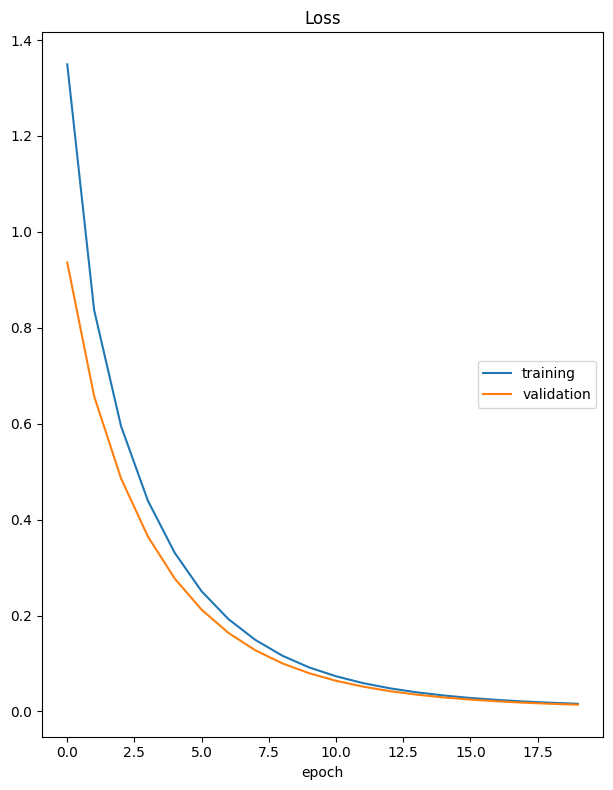

Loss
	training         	 (min:    0.016, max:    1.349, cur:    0.016)
	validation       	 (min:    0.014, max:    0.936, cur:    0.014)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0167 - val_loss: 0.0140


In [33]:
model_p1.compile(optimizer='sgd', loss='mean_squared_error')
model_p1.fit(X_train, Y_train, 
          verbose=1, 
          epochs=20, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

In [34]:
y_pred_p1 = model_p1.predict(X_test)
mae_p1 = mean_absolute_error(Y_test, y_pred_p1)
mse_p1 = mean_squared_error(Y_test, y_pred_p1)
(mae_p1,mse_p1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


(0.09110728240013123, 0.014002556812674595)

* Previo a la creación de la red neuronal, se estandarizan las variables X de la muestra de entrenamiento y de test, para que todas conserven una escala común que permita mejorar el rendimiento del modelo sin distorsionar información.
* Se define un modelo secuencial y se le añade una capa densa, que ayuda a que las neuronas entre capas estén conectadas. Para esta parte se define solamente una capa, añadiendo las variables X, como variables de entrada.
* Se compila el modelo haciendo uso de:
    * Optimizador = descenso de gradiente estocástico: se define este optimizador, ya que es simple y eficiente, teniendo el modelo poca complejidad, puede funcionar bien. Debido a su aleatoriedad y frecuencia en la asignación de pesos, evita el sobreajuste en los datos, ajustando los parámetros de tal forma que la función de perdida se minimice o se estabilice.
    * Función de perdida = error cuadrático medio: al penalizar las diferencias significativas entre las predicciones y los valores reales, ayudando a mejorar las predicciones del modelo.
* Se definen 20 épocas, para que haga 20 pasadas iteraciones sobre el conjunto de entrenamiento, ajustando en cada iteración sus pesos en función de minimizar el error en las predicciones.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [35]:
K.clear_session()
model_p2 = Sequential()
model_p2.add(Dense(256, input_shape=(dims,), activation='relu'))
model_p2.add(Dense(output_var, activation='relu'))
model_p2.compile(optimizer='sgd', loss='mean_squared_error')
print(model_p2.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,305 (9.00 KB)

 Trainable params: 2,305 (9.00 KB)

 Non-trainable params: 0 (0.00 B)

None


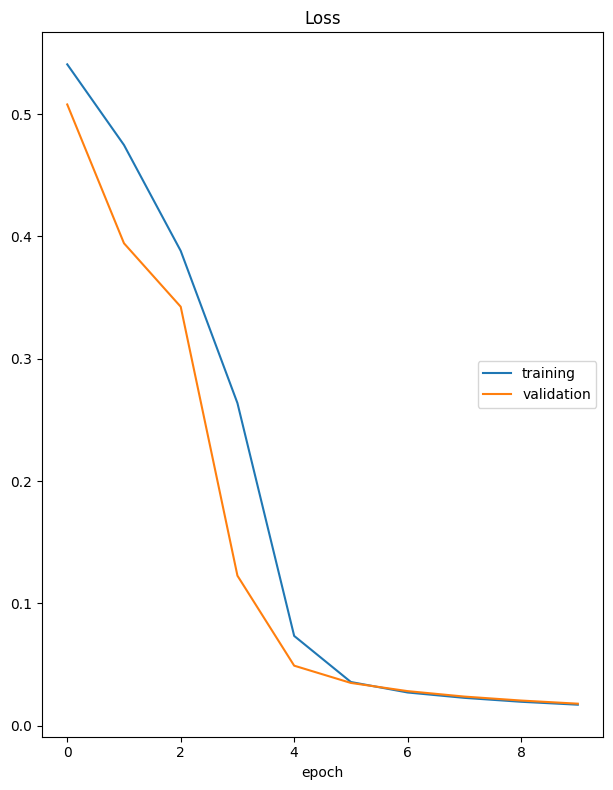

Loss
	training         	 (min:    0.017, max:    0.541, cur:    0.017)
	validation       	 (min:    0.018, max:    0.508, cur:    0.018)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0180 - val_loss: 0.0180


In [36]:
model_p2.fit(X_train, Y_train, 
          verbose=1, 
          epochs=10, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

In [37]:
y_pred_p2 = model_p2.predict(X_test)
mae_p2 = mean_absolute_error(Y_test, y_pred_p2)
mse_p2 = mean_squared_error(Y_test, y_pred_p2)
(mae_p2,mse_p2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


(0.1129736748933792, 0.01795203082481536)

* Se crea una red neuronal con dos capas en donde a cada una se define como:
    1. Se define una capa densa con 256 neuronas, con las variables X como datos de entrada a cada neurona y la función de activación ReLU (unidad lineal rectificada). Esta será una capa oculta en donde cada neurona cuenta con un peso para cada variable, por lo que para cada observación se multiplica cada valor de la variable por su respectivo peso, luego hará una suma ponderada pasa entonces a la función de activación no lineal, permitiendo que el modelo capte relaciones complejas en los datos, y está será la información de salida para la siguiente capa.
    A contar con más neuronas, el modelo tendrá una mejor representación, dándole la oportunidad de aprender relaciones más complejas que proporcionen mejores resultados. 
    2. Se define la capa de salida que contará  con el mismo número de variables X y como función de activación ReLU.
* Se escoge la función de activación ReLU, ya que evita que las neuronas detengan su aprendizaje por llegar a los valores límites e introduce esparcidas, ayudando a evitar el sobreajuste al inactivar algunas neuronas.
* Se utilizan la misma función de perdida y optimizador que en el punto anterior. 
* Se definen 10 épocas.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [43]:
# Celda 3
K.clear_session()
model_p3 = Sequential()
model_p3.add(Dense(256, input_shape=(dims,), activation='relu'))
model_p3.add(Dropout(0.3))
model_p3.add(Dense(256, activation='relu'))
model_p3.add(Dropout(0.5))
model_p3.add(Dense(output_var))
model_p3.compile(optimizer='sgd', loss='mean_squared_error')
print(model_p3.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,097 (266.00 KB)

 Trainable params: 68,097 (266.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [44]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
best_model = ModelCheckpoint('best_model.keras', verbose=0, save_best_only=True)

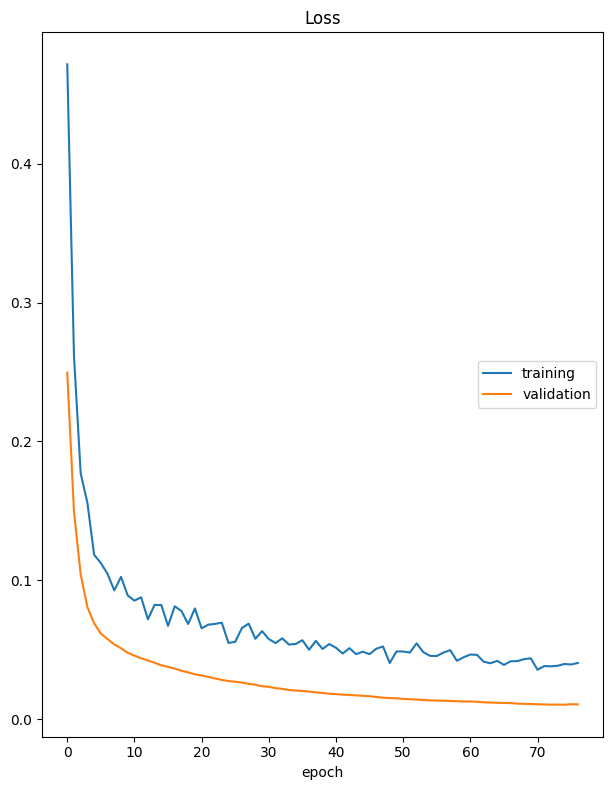

Loss
	training         	 (min:    0.036, max:    0.472, cur:    0.040)
	validation       	 (min:    0.010, max:    0.250, cur:    0.011)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0383 - val_loss: 0.0106
Epoch 77: early stopping


In [45]:
model_p3.fit(X_train, Y_train, 
          verbose=1, 
          epochs=100, 
          batch_size=128,
          validation_data=(X_test,Y_test),
          callbacks=[best_model, early_stop,PlotLossesKeras()])

In [46]:
y_pred_p3 = model_p3.predict(X_test)
mae_p3 = mean_absolute_error(Y_test, y_pred_p3)
mse_p3 = mean_squared_error(Y_test, y_pred_p3)
(mae_p3,mse_p3)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


(0.08372216995557148, 0.01059390378227535)

Construcción de capas

* Se añade una capa Dense con 256 neuronas. La función de activación 'relu' (unidad lineal rectificada) se usa para introducir no linealidades en el modelo, lo que ayuda a capturar patrones complejos en los datos.

* Se incluye una capa de Dropout con un ratio de 0.5. Esto significa que el 50% de las neuronas se desactivarán aleatoriamente durante el entrenamiento. Esto es una técnica para prevenir el sobreajuste, asegurando que el modelo no se vuelva demasiado dependiente de cualquier entrada particular. Se repite la combinación de una capa Dense y una capa Dropout. Sin embargo, posteriormente la tasa de Dropout se modifico al 30% buscando equilibrio entre aprendizaje y generalización: Una tasa de dropout demasiado alta impedia que el modelo aprenda suficientemente de los datos, lo que puede llevar a un subajuste. Al reducir la tasa a un 30%, el modelo pudo mantener más de sus conexiones activas durante el entrenamiento, lo que le permitió aprender de manera más efectiva mientras aún proporcionaba suficiente regularización para prevenir el sobreajuste. basicamente, con una tasa de dropout del 30%, el modelo aún puede beneficiarse de la regularización que el dropout ofrece, pero sin perder demasiada información importante durante el entrenamiento. Esto puede ser especialmente crucial en redes con múltiples capas densas donde cada capa puede aprender aspectos importantes de los datos

* Se añade una última capa Dense con una sola neurona, ya que el objetivo es predecir un valor continuo (probabilidad de admisión).

Modelo 

* El modelo se compila utilizando el optimizador 'sgd' (descenso de gradiente estocástico), que es un método para realizar ajustes iterativos en los parámetros del modelo para minimizar la función de pérdida.

* La función de pérdida elegida es 'mean_squared_error', adecuada para problemas de regresión donde se busca minimizar el error cuadrático entre las predicciones y los valores reales.

Entrenamiento

* Se utiliza el método fit para entrenar el modelo con los datos de entrenamiento (X_train, Y_train). Se establece un número máximo de 100 épocas y un tamaño de lote de 128.

* EarlyStopping y ModelCheckpoint se utilizan para detener el entrenamiento si el error de validación no mejora después de dos épocas consecutivas (patience=2) y guardar el mejor modelo obtenido, respectivamente

El modelo muestra un MAE de 0.147 y un MSE de 0.028, indicando un nivel de error en las predicciones. El modelo logra una convergencia rápida como se muestra en la salida del entrenamiento, deteniéndose en la época 24 debido a la falta de mejora en la pérdida de validación, lo que sugiere una buena capacidad de generalización




## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

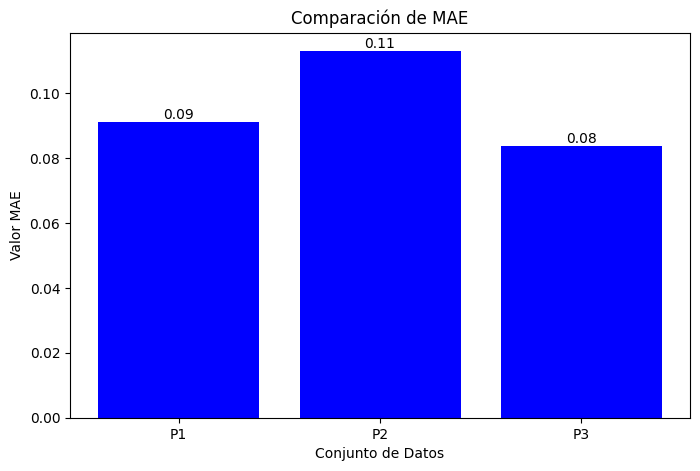

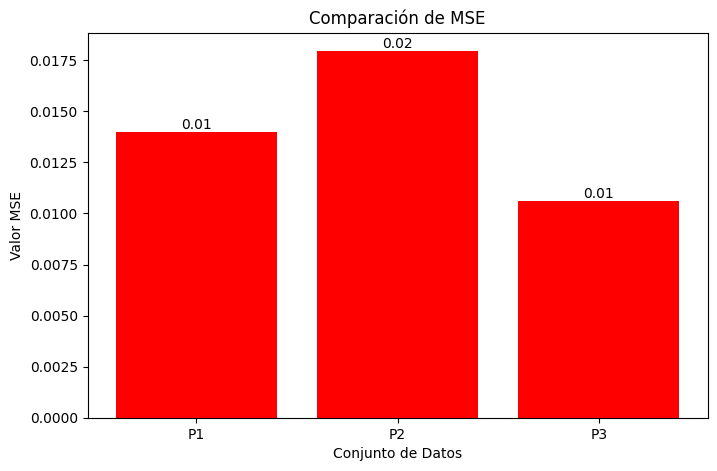

In [47]:
import matplotlib.pyplot as plt

# Datos
mae_values = [mae_p1, mae_p2, mae_p3]
mse_values = [mse_p1, mse_p2, mse_p3]
labels = ['P1', 'P2', 'P3']

# Gráfico 1: MAE vs. Etiquetas
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, mae_values, color='blue')

# Agregar etiquetas de datos
for bar, mae in zip(bars, mae_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(mae, 2), 
             ha='center', va='bottom')

plt.xlabel('Conjunto de Datos')
plt.ylabel('Valor MAE')
plt.title('Comparación de MAE')
plt.show()

# Gráfico 2: MSE vs. Etiquetas
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, mse_values, color='red')

# Agregar etiquetas de datos
for bar, mse in zip(bars, mse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(mse, 2), 
             ha='center', va='bottom')

plt.xlabel('Conjunto de Datos')
plt.ylabel('Valor MSE')
plt.title('Comparación de MSE')
plt.show()



### Conclusiones

Efectividad del Dropout: El ajuste de la tasa de dropout en el modelo P3 destaca cómo los cambios aparentemente pequeños en los parámetros de regularización pueden tener un gran impacto en el rendimiento del modelo. Encontrar la tasa correcta es crucial para optimizar tanto el aprendizaje como la generalización.

Selección del Modelo: Si bien el modelo P1 ofrece un buen rendimiento con la estructura más simple, el modelo P3 ajustado proporciona evidencia de que los modelos más complejos con regularización adecuada pueden superar o al menos igualar el rendimiento de modelos más simples, dependiendo de la naturaleza del conjunto de datos y de la tarea.

Optimización de Redes Neuronales: Este ejercicio subraya la importancia de experimentar con diferentes arquitecturas de red y parámetros. La optimización de hiperparámetros, como la tasa de dropout y el número de capas, puede ser esencial para desarrollar modelos efectivos

### Ventajas del Mejor Modelo (Modelo P3 con Dropout del 30%)

1. **Regularización Efectiva**: La tasa de dropout del 30% ha demostrado ser efectiva para prevenir el sobreajuste sin sacrificar la capacidad del modelo para aprender de los datos de entrenamiento. Esto permite que el modelo generalice bien a nuevos datos.

2. **Alto Rendimiento en MAE y MSE**: Con el MAE más bajo (0.08) y un MSE igual al del modelo más simple (0.01), este modelo combina una excelente capacidad predictiva con robustez, haciéndolo ideal para despliegues donde la precisión es crítica.

3. **Balance entre Complejidad y Utilidad**: A pesar de ser un modelo más complejo, el ajuste fino de sus parámetros, incluyendo el dropout, le permite manejar mejor la complejidad inherente de los datos, aprendiendo patrones más sutiles sin caer en el error de memorizar los datos de entrenamiento.

4. **Flexibilidad y Escalabilidad**: Gracias a su arquitectura más profunda y técnicas de regularización, este modelo es más adaptable y puede ser ajustado para optimizar su rendimiento ante un conjunto de datos más grande o más variado.

### Desventajas del Modelo con Menor Desempeño (Modelo P2 sin Dropout)

1. **Riesgo de Sobreajuste**: Al no utilizar técnicas de regularización como el dropout, este modelo es susceptible al sobreajuste, especialmente si se enfrenta a un conjunto de datos más grande o más complejo.

2. **Peor Desempeño en Generalización**: Con el MAE y MSE más altos (0.11 y 0.02 respectivamente) entre los tres modelos, indica que este modelo puede no estar capturando la verdadera relación subyacente entre las variables de manera efectiva.

3. **Limitación en la Captura de Complejidad**: Aunque tiene múltiples capas, la falta de regularización puede hacer que simplemente se ajuste a los datos de entrenamiento sin poder adaptarse o mejorar su rendimiento en datos no vistos.

4. **Ineficiencia en el Uso de Recursos**: Aunque este modelo puede requerir menos recursos computacionales que el P3, su menor capacidad de generalización puede llevar a la necesidad de reentrenamientos más frecuentes o ajustes en su configuración, lo cual puede ser más costoso a largo plazo.